In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [249]:
columns=["ID", "Age", "Gender", "Education","Country", "Ethnicity","Nscore", "Escore","Oscore", 
"Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caffein", 
"Cannabis", "Chocolate", "Coke",  "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", 
"Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

drug_consumption=pd.read_csv("drug_consumption.data", names = columns, index_col=0)
drug_category = drug_consumption.copy()  # To save original data, drug_consumption.
drug_consumption.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [250]:
#drug_consumption.describe()
#drug_consumption.isna().sum()
drug_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   object 
 13  Amphet     1885 non-null   object 
 14  Amyl       1885 non-null   object 
 15  Benzos     1885 non-null   object 
 16  Caffein    1885 non-null   object 
 17  Cannabis   1885 non-null   object 
 18  Chocolate  1885 non-null   object 
 19  Coke       1885 non-null   object 
 20  Crack      18

## Distribution of Features in Data

								FEATURE DISTRIBUTION



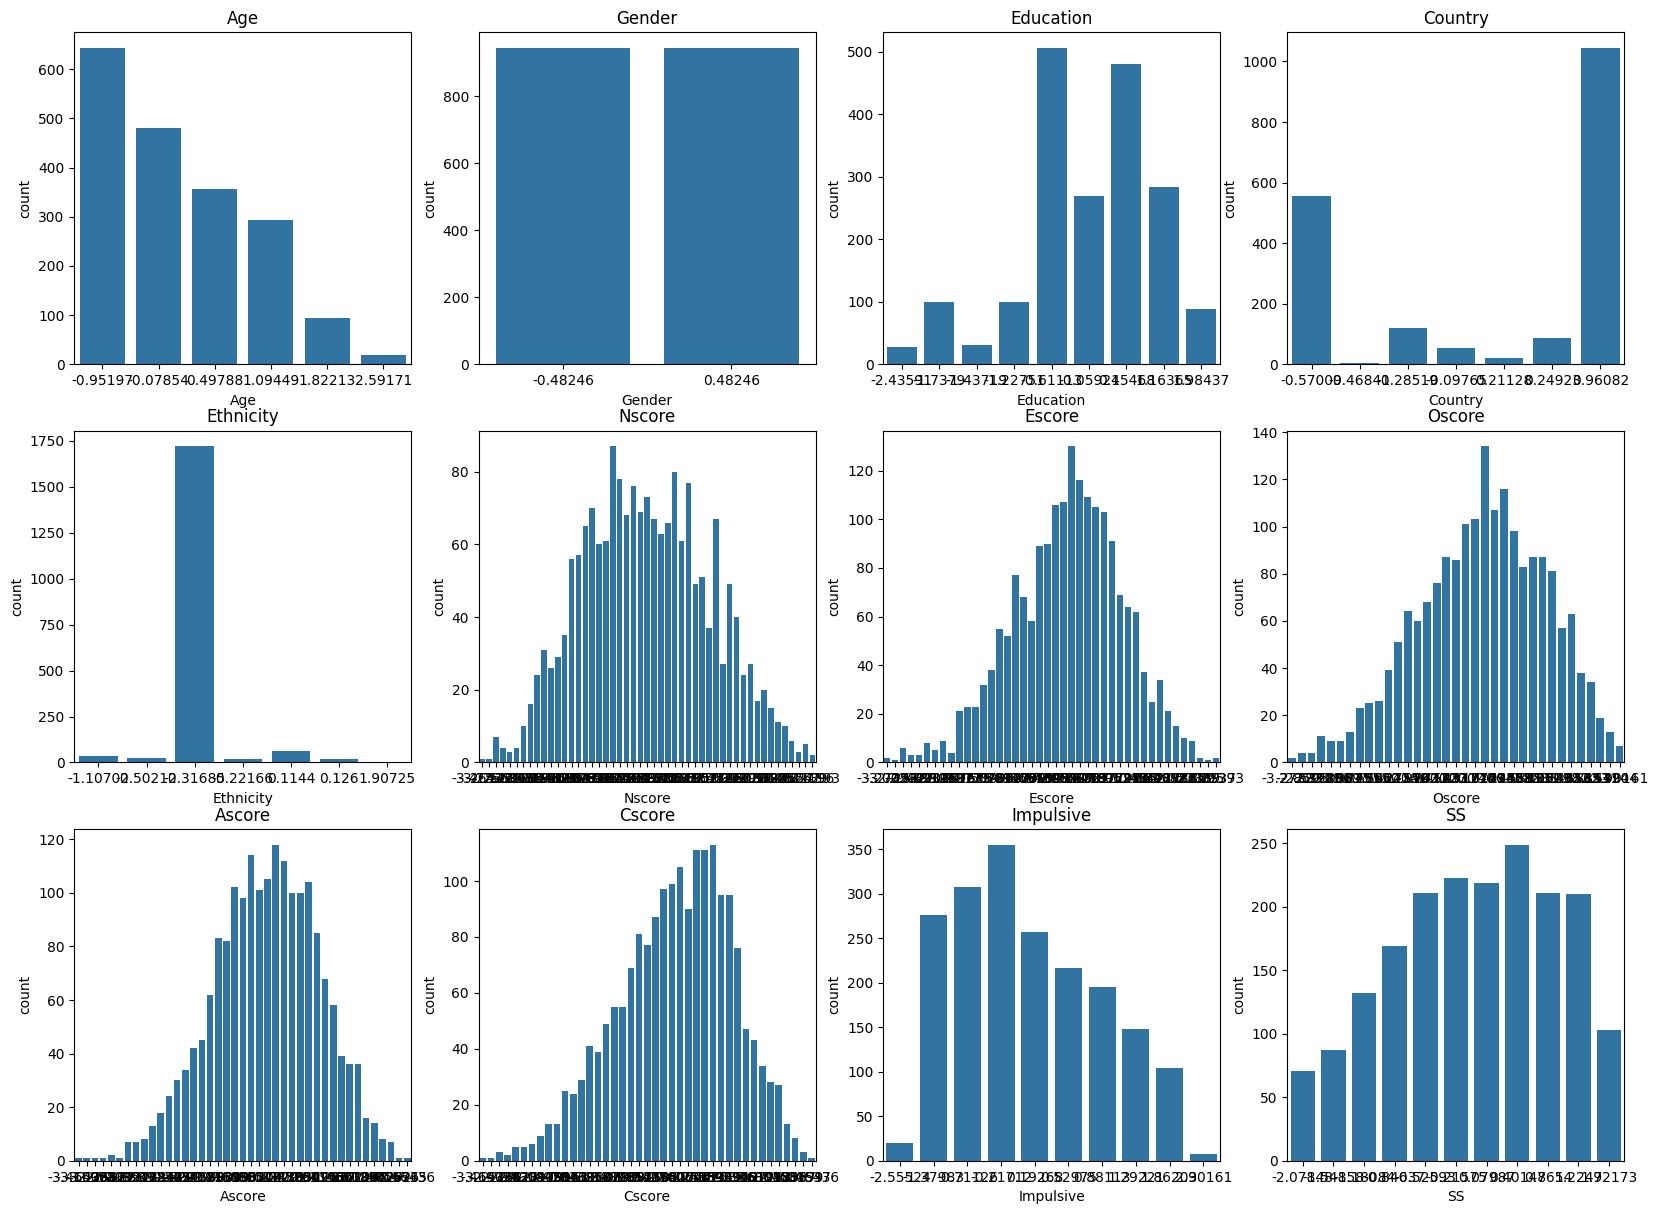

In [251]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  
axes = axes.flatten()  # Convert axes to plain data.
features=["Age", "Gender", "Education","Country", "Ethnicity",
"Nscore", "Escore","Oscore", "Ascore", "Cscore", "Impulsive", "SS"]

for i in range(12):    # placing each graph.
    sns.countplot(data=drug_consumption, x=drug_consumption[features[i]],
                  ax=axes[i])
    axes[i].set_title(features[i])

# Removing empty axes.
for j in range(12, len(axes)):
    fig.delaxes(axes[j])
print("\t\t\t\t\t\t\t\tFEATURE DISTRIBUTION\n") 
plt.show()

## Categorize Targets with LabelEncoder

In [252]:
#Explanation of each category was written.
 
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

level = {'CL0': 'Never Used',
        'CL1': 'Used over a Decade Ago',
        'CL2': 'Used in Last Decade',
        'CL3': 'Used in Last Year',
        'CL4': 'Used in Last Month',
        'CL5': 'Used in Last Week',
        'CL6': 'Used in Last Day'}
all_drugs= ["Alcohol", "Amphet", "Amyl", "Benzos", "Caffein", "Cannabis", "Chocolate", 
            "Coke",  "Crack", "Ecstasy", "Heroin", "Ketamine", 
            "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]                                                                               

for i in all_drugs :    
    drug_category[i] = drug_category[i].replace(level)  
# Categorization with LabelEncoder for all ordered drug types in the target group.
for col in all_drugs :  
    drug_category[col] = label.fit_transform(drug_category[col])

#label.classes_   Categorical variables.
drug_category.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,3,0,2,0,2,5,0,3,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,6,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,6,0,0,6,0,0,2,2,0,0


## Distribution of Targets in Data: 

							HEROIN, METH, VSA DISTRIBUTION



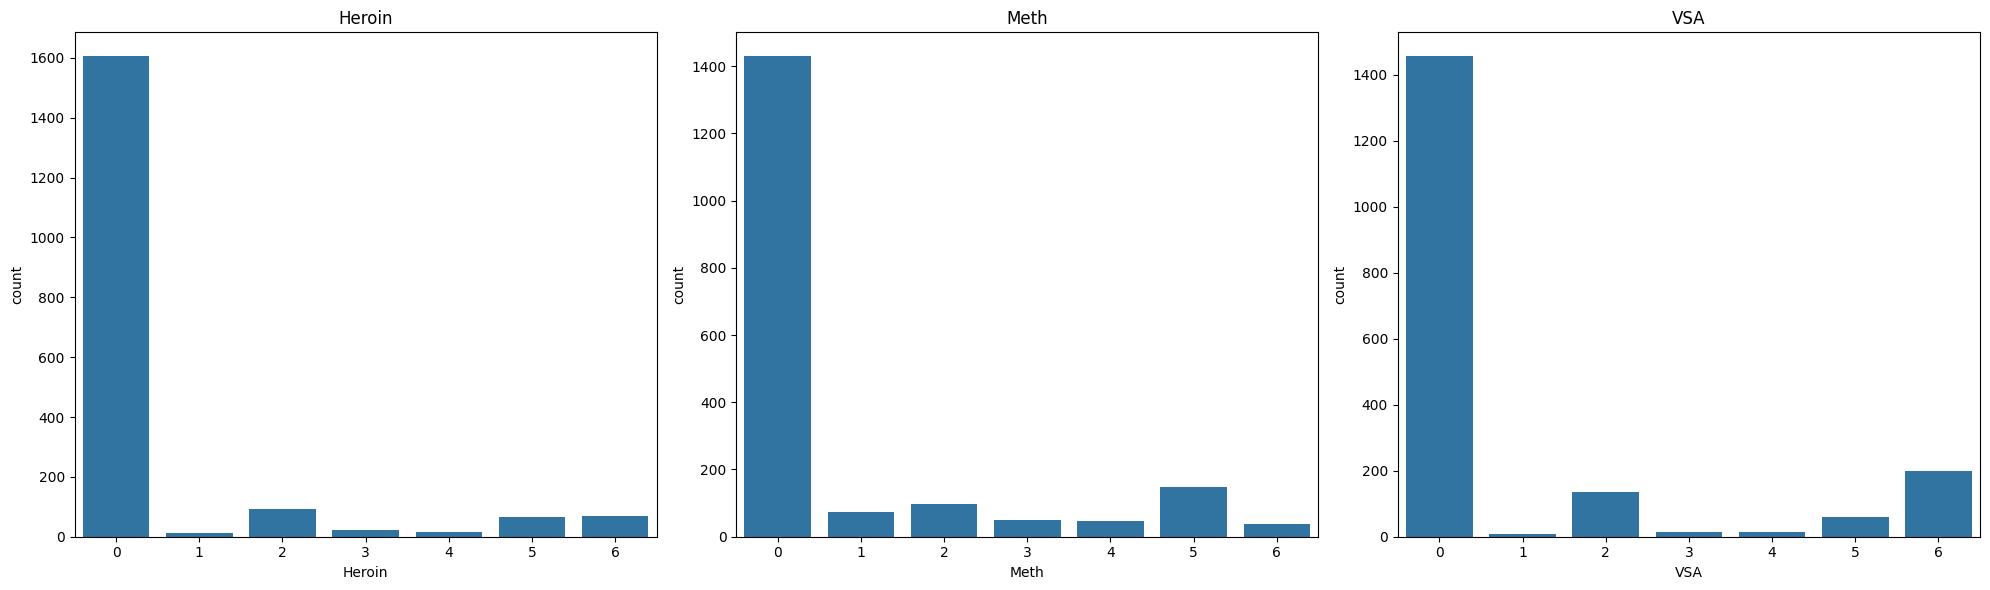

In [253]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))  
axes = axes.flatten()  # Convert axes to plain data.
target_list =["Heroin", "Meth", "VSA"]

for i in range(3):    # Placing each grraph.
    sns.countplot(data=drug_category, x=drug_category[target_list[i]], ax=axes[i])
    axes[i].set_title(target_list[i])

# Removing empty axes.
for j in range(3, len(axes)):
    fig.delaxes(axes[j])
print("\t\t\t\t\t\t\tHEROIN, METH, VSA DISTRIBUTION\n") 
plt.tight_layout()
plt.show()

In [254]:
#Categories were combined without losing their meaning, reducing the number of categories from 7 to 4.

new_level = { 0 : 0,
              1 : 1,
              2 : 1,
              3 : 2,
              4 : 3,
              5 : 3,
              6 : 3  }

new_level_meaning = {0 : 'Never Used',
                     1 : 'Used Before Last Year',
                     2 : 'Used in Last Year',
                     3 : 'Used in Last Month'}

for i in all_drugs :    
    drug_category[i] = drug_category[i].replace(new_level) 

In [255]:
drug_category.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,2,0,1,0,1,3,0,2,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,3,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,3,0,0,3,0,0,1,1,0,0


## Correlation Analysis with Heatmap before OneHotCoder

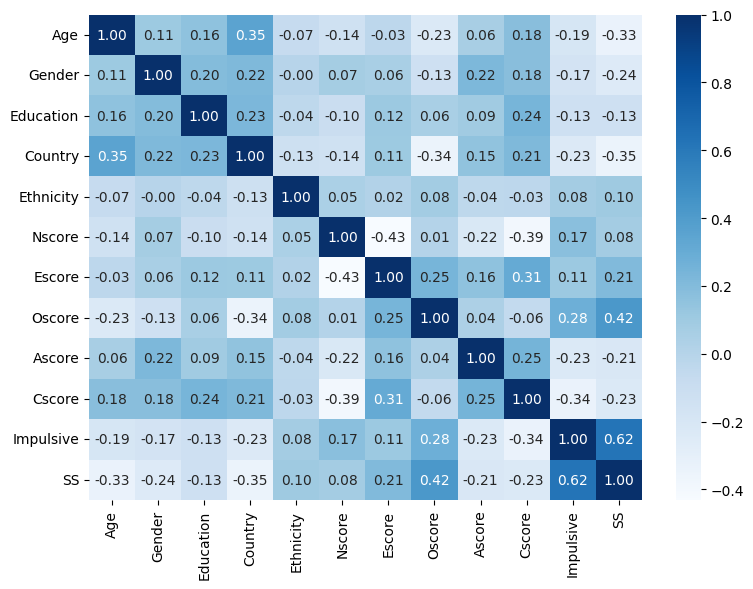

In [256]:
#pip install --upgrade matplotlib seaborn    (Heatmap labels may requires updates.)

plt.figure(figsize=(8, 6))
all_features=[ "Age", "Gender", "Education","Country", "Ethnicity","Nscore", "Escore","Oscore", "Ascore", "Cscore", "Impulsive", "SS"]
sns.heatmap(drug_category[all_features].corr(), annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 10})
plt.tight_layout()

# Correlation between SS and Impulsive seems high: 0.62. Its effect will be considered.

## Definition of Feature Categories

In [257]:
#Features are'nt carrying numerical values. Definition of these data before OneHotCoding.

age = {-0.95197: '18-24',
       -0.07854: '25 - 34',
        0.49788: '35 - 44',
        1.09449: '45 - 54',
        1.82213: '55 - 64',
        2.59171: '65+'}
gender = {0.48246: 'Female',
            -0.48246: 'Male'}
education = {-2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College,No Certificate Or Degree',
            -0.05921: 'Professional Certificate/ Diploma',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree'}
country = {-0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'}
ethnicity = {-0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725: 'Mixed-Black/Asian',
            0.12600: 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440: 'Other',
            -0.31685: 'White'}
drug_category['Age'] = (drug_category['Age'].replace(age)).astype("category")
drug_category['Gender'] = drug_category['Gender'].replace(gender).astype("category")
drug_category['Education'] = drug_category['Education'].replace(education).astype("category")
drug_category['Country'] = drug_category['Country'].replace(country).astype("category")
drug_category['Ethnicity'] = drug_category['Ethnicity'].replace(ethnicity).astype("category")                                                                                

drug_category.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,2,0,1,0,1,3,0,2,0,0
3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,3,0,0,0
4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,3,0,0,3,0,0,1,1,0,0


In [258]:
drug_category['Age'] = (drug_category['Age'].replace(age)).astype("category")

In [259]:
#A few observations are collected under the name Other to create more balanced Features for "Age", "Education", "Country", "Ethnicity"

other_group= ["Age", "Education", "Country", "Ethnicity"]
category=[]

for other in other_group:
    category_count = drug_category[other].value_counts()
    category = list(category_count[category_count<120].index)
    drug_category[other] = drug_category[other].replace(category, "Others")
    
#drug_category[other].value_counts()
drug_category.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,35 - 44,Female,Professional Certificate/ Diploma,UK,Others,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
2,25 - 34,Male,Others,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,2,0,1,0,1,3,0,2,0,0
3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,3,0,0,0
4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
5,35 - 44,Female,Others,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,3,0,0,3,0,0,1,1,0,0


## One Hot Encoding with get_dummies

In [260]:
# Features to be implemented in One Hot Encoding with Get Dummies.
one_encode_list= ["Age", "Gender", "Education", "Country", "Ethnicity"]  

drug_one_encode = pd.get_dummies(drug_category[one_encode_list], drop_first = True, dtype = "int" )  

#Removed columns that had one_hot_encoder applied.
drug_category_one=pd.concat([drug_one_encode, drug_category.drop(one_encode_list, axis=1)],axis=1)

#List of removed columns':
drop_list= ["SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caffein", "Cannabis", "Chocolate", "Coke", 
            "Crack", "Ecstasy", "Ketamine", "Legalh", "LSD", "Mushrooms", "Nicotine", "Semer"]
drug_new= drug_category_one.drop(drop_list, axis=1)  # Data set for modeling.
drug_new.head(5)            

,Age_25 - 34,Age_35 - 44,Age_45 - 54,Age_Others,Gender_Male,Education_Masters Degree,Education_Professional Certificate/ Diploma,"Education_Some College,No Certificate Or Degree",Education_University Degree,Country_UK,...,Ethnicity_White,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Heroin,Meth,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,1,0,0,1,...,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,0,0,0
2,1,0,0,0,1,0,0,0,0,1,...,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,0,3,0
3,0,1,0,0,1,0,1,0,0,1,...,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,1,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,0,0,0
5,0,1,0,0,0,0,0,0,0,1,...,1,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,0,0,0


In [261]:
feature_list = drug_new.columns.drop(['Heroin', 'Meth', 'VSA'])
feature_list = ['Age_25 - 34', 'Age_35 - 44', 'Age_45 - 54', 'Age_Others','Gender_Male', 'Education_Masters Degree',
       'Education_Professional Certificate / Diploma','Education_Some College,No Certificate Or Degree','Education_University Degree', 
       'Country_UK', 'Country_USA','Ethnicity_White', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore','Impulsive']
len(feature_list)

18

## Drug Usage Distribution (According to CL Rating.)

In [262]:
drug_category.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,35 - 44,Female,Professional Certificate/ Diploma,UK,Others,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
2,25 - 34,Male,Others,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,2,0,1,0,1,3,0,2,0,0
3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,3,0,0,0
4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
5,35 - 44,Female,Others,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,3,0,0,3,0,0,1,1,0,0


In [263]:
drug_category
drug_category_one
drug_new.head(5)  # Data for Modeling

,Age_25 - 34,Age_35 - 44,Age_45 - 54,Age_Others,Gender_Male,Education_Masters Degree,Education_Professional Certificate/ Diploma,"Education_Some College,No Certificate Or Degree",Education_University Degree,Country_UK,...,Ethnicity_White,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Heroin,Meth,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,1,0,0,1,...,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,0,0,0
2,1,0,0,0,1,0,0,0,0,1,...,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,0,3,0
3,0,1,0,0,1,0,1,0,0,1,...,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,1,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,0,0,0
5,0,1,0,0,0,0,0,0,0,1,...,1,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,0,0,0


In [264]:
# Columns of Main Data
columns=["Age", "Gender", "Education","Country", "Ethnicity","Nscore", "Escore","Oscore", "Ascore", "Cscore", "Impulsive", "SS", 
         "Alcohol", "Amphet", "Amyl", "Benzos", "Caffein", "Cannabis", "Chocolate", "Coke",  "Crack", "Ecstasy", "Heroin", "Ketamine", 
         "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

# Selected model data after evaluation:
features= ["Age", "Gender", "Education","Country", "Ethnicity","Nscore", "Escore","Oscore", "Ascore", "Cscore", "Impulsive"]
                                           
targets= ["Amphet", "Amyl", "Benzos", "Cannabis", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", 
              "Mushrooms", "VSA"]

feature_list = ['Age_25 - 34', 'Age_35 - 44', 'Age_45 - 54', 'Age_Others','Gender_Male', 'Education_Masters Degree',
       'Education_Professional Certificate/ Diploma','Education_Some College,No Certificate Or Degree','Education_University Degree', 
       'Country_UK', 'Country_USA','Ethnicity_White', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore','Impulsive']
# len(feature_list) = 18

target_list =  ["Heroin", "Meth", "VSA"]

In [265]:
#pip install umap-learn
from umap import UMAP
from plotly import express
from arrow import now
import arrow

## Data Visualization : Feature Distribution and Clustering Analysis with UMAP 

In [266]:
time_start = now()
umap = UMAP(random_state=42, verbose=True, n_jobs=1, low_memory=False, n_epochs=1000)
drug_3 =drug_new   ## to save original data. 
#x and y values ​​are calculated with umap and added as columns.
drug_3[['x', 'y']] = umap.fit_transform(X=drug_3[feature_list])  
express.scatter(data_frame=drug_3, x='x', y='y').show()
print('done with UMAP in {}'.format(now() - time_start))

UMAP(low_memory=False, n_epochs=1000, n_jobs=1, random_state=42, verbose=True)
Mon Dec 16 15:36:38 2024 Construct fuzzy simplicial set
Mon Dec 16 15:36:39 2024 Finding Nearest Neighbors
Mon Dec 16 15:36:40 2024 Finished Nearest Neighbor Search
Mon Dec 16 15:36:40 2024 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

	completed  0  /  1000 epochs
	completed  100  /  1000 epochs
	completed  200  /  1000 epochs
	completed  300  /  1000 epochs
	completed  400  /  1000 epochs
	completed  500  /  1000 epochs
	completed  600  /  1000 epochs
	completed  700  /  1000 epochs
	completed  800  /  1000 epochs
	completed  900  /  1000 epochs
Mon Dec 16 15:36:47 2024 Finished embedding


done with UMAP in 0:00:09.198314


## Disitribution of Targets in Data

In [267]:
sample_drug_3 = drug_3.sample(n=400, random_state=20)
for target in target_list:
    express.scatter(data_frame=sample_drug_3, x='x', y='y', color=target).show()

In [268]:
drug_new=drug_new.drop(["x", "y"], axis=1)  # x, y columns added to the data frame with UMAP were deleted again.

In [269]:
import plotly.express as px
select_feature = ["Age", "Gender", "Country", "Ethnicity"]
for i in range(len(target_list)):    
    target = target_list[i]
    for j in range(4) :        
        select=select_feature[j]        
        d = drug_category.groupby([select, target], observed=False).size().reset_index(name='Count')
        fig = px.bar(d, x='Count', y=select, color=target, barmode='group', 
                     title=f'{target} Usage by {select}', text_auto=True)
        fig.show()
#Horizontal graph is more suitable for Education:       
    d_e = drug_category.groupby(["Education", 
            target_list[i]], observed=False).size().reset_index(name='Count')
    fig = px.bar(d_e, x='Education', y="Count", color=target, barmode='group', 
                 title=f'{target} Usage by Education', text_auto=True)
    fig.show()

# FEATURE SELECTION

In [270]:
#pip install XGBoost
#%pip install mlxtend

from sklearn.model_selection import train_test_split, cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report

# Radom Forest - Feature Selection

In [271]:
"""Random Forest Classifier : Backward Feature Selection with Sequential Feature Selector"""

forest = RandomForestClassifier(n_estimators=100, max_features=None, random_state=1)   
sfs_forest = SFS(forest, k_features=1, forward=False, cv=5, floating=False, verbose=2, n_jobs=-1, 
                 scoring='accuracy') 
target_list = ["Heroin", "Meth", "VSA"]

results_forest = {}  
for target in target_list:
    x = drug_new[feature_list]
    y = drug_new[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
    
    sfs_forest.fit(x_train, y_train)
    
    results_forest[target]=pd.DataFrame(sfs_forest.subsets_).transpose().sort_values(by='avg_score', 
                                            ascending=False).drop(["cv_scores", "feature_names"], axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   10.4s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   12.3s finished

[2024-12-16 15:37:03] Features: 17/1 -- score: 0.8494708587269807[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    6.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    8.8s finished

[2024-12-16 15:37:12] Features: 16/1 -- score: 0.8507975622098524[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    5.8s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    6.2s finished

[2024-12-16 15:37:18] Features: 15/1 -- score: 0.8494708587269807[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15

# Logistic Regression  - Feature Selection

In [272]:
"""LOGISTIC REGRESSION : Backward Feature Selection with Sequential Feature Selector"""""

# from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

sfs_log = SFS(logmodel, k_features=1, cv=5, forward=False, floating=False, verbose=2, n_jobs=-1, 
              scoring='accuracy')

results_log = {}   
for target in target_list:
    x = drug_new[feature_list]
    y = drug_new[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
        
    sfs_log.fit(x_train, y_train)

    results_log[target]=pd.DataFrame(sfs_log.subsets_).transpose().sort_values(by='avg_score', 
                                        ascending=False).drop(["cv_scores", "feature_names"], axis=1)   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished

[2024-12-16 15:40:52] Features: 17/1 -- score: 0.8501331103826099[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.7s finished

[2024-12-16 15:40:53] Features: 16/1 -- score: 0.852124265692724[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.5s finished

[2024-12-16 15:40:53] Features: 15/1 -- score: 0.852124265692724[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 |

# Support Vector Machine (SVS) - Feature Selection

In [273]:
"""SUPPORT VECTOR MACHINE (SVS): Backward Feature Selection with Sequential Feature Selector"""

vector_model = SVC(C=1,kernel='rbf')
sfs_svm = SFS(vector_model, k_features=1, forward=False, cv=5, floating=False, verbose=2, n_jobs=-1, 
              scoring='accuracy')

results_svm = {}   
for target in target_list:
    x = drug_new[feature_list]
    y = drug_new[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
        
    sfs_svm.fit(x_train, y_train)

    results_svm[target]=pd.DataFrame(sfs_svm.subsets_).transpose().sort_values(by='avg_score', 
                                         ascending=False).drop(["cv_scores", "feature_names"], axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.5s finished

[2024-12-16 15:41:04] Features: 17/1 -- score: 0.8514598138654815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    1.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.6s finished

[2024-12-16 15:41:05] Features: 16/1 -- score: 0.8514598138654815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    1.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.3s finished

[2024-12-16 15:41:07] Features: 15/1 -- score: 0.8514598138654815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15

# KNN (K-Neighobours) - Feature Selection

In [274]:
"""KNN (K-NEIGHBOURS): Backward Feature Selection with Sequential Feature Selector"""
#from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=8)
sfs_knn= SFS(knn, k_features=1, forward=False, cv=5, floating=False, verbose=2, n_jobs=-1, 
             scoring='accuracy')

results_knn = {}   
for target in target_list:
    x = drug_new[feature_list]
    y = drug_new[target]
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=1,stratify=y)
        
    sfs_knn.fit(x_train, y_train)
    
    results_knn[target]=pd.DataFrame(sfs_knn.subsets_).transpose().sort_values(by='avg_score', 
                                        ascending=False).drop(["cv_scores", "feature_names"], axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.7s finished

[2024-12-16 15:41:45] Features: 17/1 -- score: 0.8501331103826099[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.3s finished

[2024-12-16 15:41:45] Features: 16/1 -- score: 0.851462014037095[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2024-12-16 15:41:46] Features: 15/1 -- score: 0.8507997623814658[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 

In [275]:
results_knn["Heroin"]
knn_selection={}
for target in target_list:   
    knn_selection[target] = pd.DataFrame(results_knn[target]).reset_index().rename(
        columns={"index": "count","feature_idx": "feature_idx_knn", "avg_score": "avg_score_knn"})

# Feature Selection results for all models are together side by side.

In [276]:
# All Feature Selection results side by side. 
forest_selection={}
log_selection={}
svm_selection={}
knn_selection={}
for target in target_list:   
    forest_selection[target] = pd.DataFrame(results_forest[target]).reset_index().rename(
        columns={"index": "count", "feature_idx": "feature_idx_for", "avg_score": "avg_score_for"})
    log_selection[target] = pd.DataFrame(results_log[target]).reset_index().rename(
        columns={"index": "count", "feature_idx": "feature_idx_log", "avg_score": "avg_score_log"})
    svm_selection[target] = pd.DataFrame(results_svm[target]).reset_index().rename(
        columns={"index": "count","feature_idx": "feature_idx_svm", "avg_score": "avg_score_svm"})
    knn_selection[target] = pd.DataFrame(results_knn[target]).reset_index().rename(
        columns={"index": "count","feature_idx": "feature_idx_knn", "avg_score": "avg_score_knn"})
    

In [277]:
# Merging All Results
results_all_select={}
for target in target_list:
    results_all_select[target]=pd.concat([forest_selection[target], 
                                          log_selection[target], svm_selection[target], 
                                          knn_selection[target]], axis=1)    
for target, df in results_all_select.items():
    print(f"{target} : Comparison of Feature Selection and Model")
    display(df) 

Heroin : Comparison of Feature Selection and Model


,count,feature_idx_for,avg_score_for,count,feature_idx_log,avg_score_log,count,feature_idx_svm,avg_score_svm,count,feature_idx_knn,avg_score_knn
0,1,"(15,)",0.852784,9,"(0, 1, 4, 5, 6, 12, 14, 15, 17)",0.852787,18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.85146,13,"(0, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 15, 16)",0.852126
1,14,"(0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17)",0.8508,14,"(0, 1, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17)",0.852787,17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.85146,12,"(0, 2, 4, 5, 7, 8, 10, 11, 13, 14, 15, 16)",0.852126
2,16,"(0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...",0.850798,13,"(0, 1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 17)",0.852787,2,"(0, 1)",0.85146,9,"(0, 2, 4, 7, 8, 10, 11, 14, 15)",0.851464
3,12,"(0, 2, 5, 8, 9, 10, 11, 12, 14, 15, 16, 17)",0.849475,12,"(0, 1, 4, 5, 6, 8, 9, 11, 12, 14, 15, 17)",0.852787,3,"(0, 1, 2)",0.85146,14,"(0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16)",0.851464
4,11,"(0, 2, 5, 9, 10, 11, 12, 14, 15, 16, 17)",0.849473,11,"(0, 1, 4, 5, 6, 8, 9, 12, 14, 15, 17)",0.852787,4,"(0, 1, 2, 3)",0.85146,11,"(0, 2, 4, 5, 7, 8, 10, 11, 14, 15, 16)",0.851464
5,15,"(0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",0.849471,10,"(0, 1, 4, 5, 6, 8, 12, 14, 15, 17)",0.852787,5,"(0, 1, 2, 3, 4)",0.85146,16,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...",0.851462
6,17,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.849471,16,"(0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...",0.852124,6,"(0, 1, 2, 3, 4, 5)",0.85146,6,"(0, 2, 4, 7, 8, 10)",0.85146
7,18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.849469,15,"(0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...",0.852124,7,"(0, 1, 2, 3, 4, 5, 6)",0.85146,2,"(0, 2)",0.85146
8,13,"(0, 1, 2, 5, 8, 9, 10, 11, 12, 14, 15, 16, 17)",0.848815,8,"(0, 1, 4, 5, 6, 12, 14, 17)",0.852124,8,"(0, 1, 2, 3, 4, 5, 6, 7)",0.85146,3,"(0, 2, 4)",0.85146
9,10,"(0, 2, 5, 9, 10, 12, 14, 15, 16, 17)",0.848811,7,"(0, 1, 4, 5, 12, 14, 17)",0.852124,9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.85146,4,"(0, 2, 4, 7)",0.85146


Meth : Comparison of Feature Selection and Model


,count,feature_idx_for,avg_score_for,count,feature_idx_log,avg_score_log,count,feature_idx_svm,avg_score_svm,count,feature_idx_knn,avg_score_knn
0,1,"(13,)",0.756635,16,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...",0.765261,7,"(3, 4, 5, 6, 7, 8, 10)",0.763264,11,"(0, 1, 4, 6, 7, 8, 10, 12, 13, 15, 17)",0.759273
1,16,"(0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...",0.744694,15,"(0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1...",0.764599,6,"(4, 5, 6, 7, 8, 10)",0.761937,9,"(0, 1, 7, 8, 10, 12, 13, 15, 17)",0.75861
2,17,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.742045,14,"(0, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17)",0.763937,8,"(1, 3, 4, 5, 6, 7, 8, 10)",0.760606,10,"(0, 1, 6, 7, 8, 10, 12, 13, 15, 17)",0.75861
3,14,"(0, 1, 2, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16,...",0.742034,13,"(0, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17)",0.76261,11,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12)",0.759948,1,"(1,)",0.757957
4,15,"(0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15, ...",0.740716,12,"(0, 4, 5, 7, 8, 9, 10, 13, 14, 15, 16, 17)",0.762608,10,"(0, 1, 3, 4, 5, 6, 7, 8, 10, 12)",0.759948,12,"(0, 1, 4, 6, 7, 8, 10, 11, 12, 13, 15, 17)",0.75795
5,12,"(0, 1, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17)",0.740714,11,"(0, 4, 5, 7, 8, 9, 10, 13, 14, 15, 17)",0.762604,9,"(1, 3, 4, 5, 6, 7, 8, 10, 12)",0.759286,13,"(0, 1, 2, 4, 6, 7, 8, 10, 11, 12, 13, 15, 17)",0.75795
6,13,"(0, 1, 2, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17)",0.74071,8,"(4, 5, 7, 8, 10, 13, 14, 17)",0.762601,12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)",0.758621,2,"(1, 15)",0.757292
7,9,"(0, 7, 9, 12, 13, 14, 15, 16, 17)",0.74007,9,"(4, 5, 7, 8, 10, 13, 14, 15, 17)",0.761941,2,"(4, 5)",0.757957,14,"(0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 17)",0.75729
8,11,"(0, 1, 7, 9, 10, 12, 13, 14, 15, 16, 17)",0.739385,10,"(0, 4, 5, 7, 8, 10, 13, 14, 15, 17)",0.761941,3,"(4, 5, 6)",0.757957,8,"(0, 1, 7, 8, 10, 12, 15, 17)",0.756628
9,10,"(0, 1, 7, 9, 12, 13, 14, 15, 16, 17)",0.737416,7,"(4, 5, 8, 10, 13, 14, 17)",0.761939,4,"(4, 5, 6, 7)",0.757957,7,"(1, 7, 8, 10, 12, 15, 17)",0.756628


VSA : Comparison of Feature Selection and Model


,count,feature_idx_for,avg_score_for,count,feature_idx_log,avg_score_log,count,feature_idx_svm,avg_score_svm,count,feature_idx_knn,avg_score_knn
0,1,"(16,)",0.769893,14,"(0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 16)",0.775202,7,"(0, 1, 2, 4, 5, 6, 9)",0.778522,1,"(8,)",0.771884
1,11,"(1, 4, 6, 8, 10, 12, 13, 14, 15, 16, 17)",0.765248,15,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...",0.77454,5,"(1, 4, 5, 6, 9)",0.778522,2,"(4, 8)",0.771884
2,15,"(0, 1, 2, 3, 4, 6, 8, 10, 11, 12, 13, 14, 15, ...",0.763933,13,"(0, 1, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 16)",0.77454,6,"(0, 1, 4, 5, 6, 9)",0.778522,13,"(0, 1, 2, 4, 5, 8, 10, 12, 13, 14, 15, 16, 17)",0.771877
3,13,"(0, 1, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17)",0.763933,12,"(0, 1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 16)",0.77454,8,"(0, 1, 2, 4, 5, 6, 8, 9)",0.778522,10,"(0, 1, 2, 4, 8, 10, 13, 14, 16, 17)",0.771215
4,14,"(0, 1, 2, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16,...",0.763928,9,"(0, 1, 2, 4, 9, 11, 12, 14, 16)",0.773877,4,"(1, 4, 6, 9)",0.77786,9,"(0, 1, 4, 8, 10, 13, 14, 16, 17)",0.770551
5,12,"(1, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17)",0.763922,16,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...",0.773877,9,"(0, 1, 2, 3, 4, 5, 6, 8, 9)",0.777193,14,"(0, 1, 2, 3, 4, 5, 8, 10, 12, 13, 14, 15, 16, 17)",0.770551
6,16,"(0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 1...",0.762601,11,"(0, 1, 2, 3, 4, 6, 9, 11, 12, 14, 16)",0.773877,10,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10)",0.777191,8,"(0, 4, 8, 10, 13, 14, 16, 17)",0.769897
7,17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...",0.761933,10,"(0, 1, 2, 3, 4, 9, 11, 12, 14, 16)",0.773877,11,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11)",0.776524,15,"(0, 1, 2, 3, 4, 5, 8, 10, 11, 12, 13, 14, 15, ...",0.769226
8,8,"(1, 6, 10, 12, 14, 15, 16, 17)",0.761268,8,"(0, 1, 2, 4, 9, 11, 12, 14)",0.773213,12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)",0.774537,12,"(0, 1, 2, 4, 8, 10, 12, 13, 14, 15, 16, 17)",0.76856
9,10,"(1, 6, 8, 10, 12, 13, 14, 15, 16, 17)",0.760608,7,"(0, 1, 2, 4, 9, 12, 14)",0.773213,3,"(1, 4, 9)",0.772546,5,"(4, 8, 13, 14, 17)",0.76856


In [278]:
best_select=list(knn_selection["Heroin"].iloc[1, 1])
X_select = drug_new.iloc[:, best_select]
X_select

,Age_25 - 34,Age_45 - 54,Gender_Male,Education_Masters Degree,"Education_Some College,No Certificate Or Degree",Education_University Degree,Country_USA,Ethnicity_White,Escore,Oscore,Ascore,Cscore
ID,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,-0.57545,-0.58331,-0.91699,-0.00665
2,1,0,1,0,0,0,0,1,1.93886,1.43533,0.76096,-0.14277
3,0,0,1,0,0,0,0,1,0.80523,-0.84732,-1.62090,-1.01450
4,0,0,0,1,0,0,0,1,-0.80615,-0.01928,0.59042,0.58489
5,0,0,0,0,0,0,0,1,-1.63340,-0.45174,-0.30172,1.30612
...,...,...,...,...,...,...,...,...,...,...,...,...
1884,0,0,0,0,1,0,1,1,1.74091,1.88511,0.76096,-1.13788
1885,0,0,1,0,1,0,1,1,1.74091,0.58331,0.76096,-1.51840
1886,1,0,0,0,0,1,1,1,-1.37639,-1.27553,-1.77200,-1.38502


In [279]:
Y_select=drug_new['Heroin']
#Y_select.info()

# MODELLING

In [280]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score

In [281]:
best_select=list(forest_selection["Heroin"].iloc[1,1])
best_select

[0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17]

In [282]:
X_select = drug_new.iloc[:, best_select]
X_select.head(5)

,Age_25 - 34,Age_35 - 44,Age_45 - 54,Education_Masters Degree,"Education_Some College,No Certificate Or Degree",Education_University Degree,Country_UK,Country_USA,Ethnicity_White,Nscore,Oscore,Ascore,Cscore,Impulsive
ID,,,,,,,,,,,,,,
1,0,1,0,0,0,0,1,0,0,0.31287,-0.58331,-0.91699,-0.00665,-0.21712
2,1,0,0,0,0,0,1,0,1,-0.67825,1.43533,0.76096,-0.14277,-0.71126
3,0,1,0,0,0,0,1,0,1,-0.46725,-0.84732,-1.62090,-1.01450,-1.37983
4,0,0,0,1,0,0,1,0,1,-0.14882,-0.01928,0.59042,0.58489,-1.37983
5,0,1,0,0,0,0,1,0,1,0.73545,-0.45174,-0.30172,1.30612,-0.21712


In [283]:
from sklearn import metrics

## Machine Learning Model: RANDOM FOREST CLASSIFIER with Selected Features and Best Parameters after Grid Search

In [284]:
"""HEROIN: Best Parametetrs- Grid Search for RandomForestClassifier with Selected Features, 5-KFold Validation (cv=5)""" 

clrf=RandomForestClassifier(random_state=1)

n_estimators = [200, 300, 400, 500, 600, 700, 800, 1000, 1200]
max_features = ["sqrt", "log2", None]
param_grid = {'n_estimators': n_estimators, 'max_features': max_features}

scoring = ["accuracy", "roc_auc_ovr", 'precision_micro']

grid_search = GridSearchCV(estimator=clrf, param_grid=param_grid, scoring=scoring, 
                           cv=5, verbose=2, n_jobs=-1, refit='accuracy')

best_select=list(forest_selection["Heroin"].iloc[1, 1])  
X_select = drug_new.iloc[:, best_select]
Y_select = drug_new['Heroin']

x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(
    X_select, Y_select, test_size=0.2, random_state=1, stratify=Y_select)

grid_search.fit(x_train_select, y_train_select)

cv_results = pd.DataFrame(grid_search.cv_results_)

print("\nHeroin Cross-Validation Average Scores:")
for metric in scoring:
    mean_scores = cv_results[f'mean_test_{metric}']
    print(f"Mean {metric} Scores: {mean_scores.mean()}")

print("\nBest accuracy Score:", grid_search.best_score_)

print("\nBest Parameters:", grid_search.best_params_, "\n")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Heroin Cross-Validation Average Scores:
Mean accuracy Scores: 0.8487390164580986
Mean roc_auc_ovr Scores: 0.7400612901394718
Mean precision_micro Scores: 0.8487390164580986

Best accuracy Score: 0.85013971089745

Best Parameters: {'max_features': 'sqrt', 'n_estimators': 200} 



In [285]:
"""HERON :Model Training, Prediction and Scoring (Performance Measuring) for RandomForestClassifier with best parameters"""

rfc=RandomForestClassifier(n_estimators=200, max_features='sqrt', random_state=1)

scores = cross_val_score(rfc, x_train_select, y_train_select, cv=5)

rfc.fit(x_train_select, y_train_select)
y_preds = rfc.predict_proba(x_test_select)
roc_auc = format(roc_auc_score(y_test_select, y_preds, multi_class='ovr'), ".4f")

std_devs = format(np.std(y_preds, axis=0).mean(), ".4f")

results = pd.DataFrame([], columns = ["score_cross_val", "roc_auc_test_set", 
                                      "std_cross_val", "std_test_set"])
results.loc["Heroin - RandomForest"] = [format(scores.mean(), ".4f"), roc_auc, format(scores.std(), ".4f"), std_devs]
results

,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
Heroin - RandomForest,0.8501,0.7956,0.0046,0.0887


In [286]:
"""METH: Best Parameters - Grid Search for RandomForestClassifier with Selected Features, 5-KFold Validation (cv=5)"""

clrf=RandomForestClassifier(random_state=1)

n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

max_features = ["sqrt", "log2", None]

scoring = ["accuracy", "roc_auc_ovr", 'precision_micro']

param_grid = {'n_estimators': n_estimators, 'max_features': max_features}

#Determining the best parameters.

grid_search = GridSearchCV(estimator=clrf, param_grid=param_grid, scoring=scoring, cv=5, verbose=2, n_jobs=-1, refit='accuracy')

best_select=list(forest_selection["Meth"].iloc[1, 1])  
X_select = drug_new.iloc[:, best_select]
Y_select = drug_new['Meth']

x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, Y_select, test_size=0.2, 
                                                                                random_state=1, stratify=Y_select)

grid_search.fit(x_train_select, y_train_select)

cv_results = pd.DataFrame(grid_search.cv_results_)

print("\nMETH, RFC, Cross-validation Average Scores:", "\n")
for metric in scoring:
    mean_scores = cv_results[f'mean_test_{metric}']
    print(f"Mean {metric} Scores: {mean_scores.mean()}")

print("\nBest roc_auc_ovr Score:", grid_search.best_score_, "\n")

print("\nBest Parameters:", grid_search.best_params_, "\n")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

METH, RFC, Cross-validation Average Scores: 

Mean accuracy Scores: 0.7468222921387869
Mean roc_auc_ovr Scores: 0.7532747752743474
Mean precision_micro Scores: 0.7468222921387869

Best roc_auc_ovr Score: 0.7519988559107611 


Best Parameters: {'max_features': 'sqrt', 'n_estimators': 100} 



In [287]:
"""METH :Model Training, Prediction and Scoring (Performance Measuring) for RandomForestClassifier with best parameters"""

rfc=RandomForestClassifier(n_estimators=200, max_features='sqrt', random_state=1)

scores = cross_val_score(rfc, x_train_select, y_train_select, cv=5)

rfc.fit(x_train_select, y_train_select)
y_preds = rfc.predict_proba(x_test_select)
roc_auc = format(roc_auc_score(y_test_select, y_preds, multi_class='ovr'), ".4f")

std_devs = format(np.std(y_preds, axis=0).mean(), ".4f")

results_meth = pd.DataFrame([], columns = ["score_cross_val", "roc_auc_test_set", 
                                      "std_cross_val", "std_test_set"])
results_meth.loc["Meth - RandomForest"] = [format(scores.mean(), ".4f"), roc_auc, format(scores.std(), ".4f"), std_devs]
results_meth

,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
Meth - RandomForest,0.7507,0.7818,0.0101,0.1157


In [288]:
#Training, Predicton, Scores



In [289]:
"""VSA : Best Parameters: Grid Search for RandomForestClassifier with Selected Features, 5-KFold Validation (cv=5)"""

clrf=RandomForestClassifier(random_state=1)

n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

max_features = ["sqrt", "log2", None]

scoring = ["accuracy", "roc_auc_ovr", 'precision_micro']

param_grid = {'n_estimators': n_estimators, 'max_features': max_features}

#Determining the best parameters

grid_search = GridSearchCV(estimator=clrf, param_grid=param_grid, scoring=scoring, cv=5, verbose=2, n_jobs=-1, refit='roc_auc_ovr')

#with Best feature results
best_select=list(forest_selection["VSA"].iloc[1, 1])  
X_select = drug_new.iloc[:, best_select]
Y_select = drug_new['VSA']

x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, Y_select, test_size=0.2, 
                                                                                random_state=1, stratify=Y_select)

grid_search.fit(x_train_select, y_train_select)

cv_results = pd.DataFrame(grid_search.cv_results_)

print("\nCross-validation Average Scores for 'VSA':", "\n")
for metric in scoring:
    mean_scores = cv_results[f'mean_test_{metric}']
    print(f"Mean {metric} Scores: {mean_scores.mean()}")

print("\nBest roc_auc_ovr Score:", grid_search.best_score_, "\n")

print("\nBest Parameters:", grid_search.best_params_, "\n")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Cross-validation Average Scores for 'VSA': 

Mean accuracy Scores: 0.7670157605626574
Mean roc_auc_ovr Scores: 0.6265939177249915
Mean precision_micro Scores: 0.7670157605626574

Best roc_auc_ovr Score: 0.6397504441640343 


Best Parameters: {'max_features': 'sqrt', 'n_estimators': 400} 



In [290]:
"""VSA :Model Training, Prediction and Scoring (Performance Measuring) for RandomForestClassifier with best parameters"""
rfc=RandomForestClassifier(n_estimators=200, max_features='sqrt', random_state=1)

scores = cross_val_score(rfc, x_train_select, y_train_select, cv=5)

rfc.fit(x_train_select, y_train_select)
y_preds = rfc.predict_proba(x_test_select)
roc_auc = format(roc_auc_score(y_test_select, y_preds, multi_class='ovr'), ".4f")

std_devs = format(np.std(y_preds, axis=0).mean(), ".4f")

results_vsa = pd.DataFrame([], columns = ["score_cross_val", "roc_auc_test_set", 
                                      "std_cross_val", "std_test_set"])
results_vsa.loc["VSA - RandomForest"] = [format(scores.mean(), ".4f"), roc_auc, format(scores.std(), ".4f"), std_devs]
results_vsa

,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
VSA - RandomForest,0.7699,0.5798,0.0092,0.0886


## ML Model: LOGISTIC REGRESSION with Selected Features and Best Parameters after Grid Search

In [291]:
"""HEROIN, Best Parametetrs: Grid Search for Logistic Rggression with Selected Features, 5-KFold Validation (cv=5)"""
#from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression(max_iter = 10000, solver='liblinear')

C_log_range = [0.2, 0.3, 0.4, 0.5, 0.8, 1, 1.4, 2, 2.5, 3, 3.5, 4]
penalties=['l1', 'l2']
scoring = ["accuracy", "roc_auc_ovr", 'precision_micro']

param_log = {'C': C_log_range, 'penalty': penalties}
grid_search_log = GridSearchCV (estimator=log_model, param_grid=param_log, scoring=scoring, cv=5, verbose=2, n_jobs=-1, refit='roc_auc_ovr')

best_select=list(log_selection["Heroin"].iloc[1, 1])
X_select = drug_new.iloc[:, best_select]
Y_select = drug_new['Heroin']

x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, Y_select, test_size=0.2, random_state=1, stratify=Y_select)

grid_search_log.fit(x_train_select, y_train_select)

cv_results_log = pd.DataFrame(grid_search_log.cv_results_)

print("\nCross-validation average scores:", "\n")
for metric in scoring:
    mean_scores_log = cv_results_log[f'mean_test_{metric}']
    print(f"Mean {metric} scores: {mean_scores_log.mean()}")

print("\nBest roc_auc_ovr score:", grid_search_log.best_score_)

print("\nBest Parameters:", grid_search_log.best_params_, "\n")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Cross-validation average scores: 

Mean accuracy scores: 0.8522339075781243
Mean roc_auc_ovr scores: 0.7687669848412542
Mean precision_micro scores: 0.8522339075781243

Best roc_auc_ovr score: 0.7727697351537853

Best Parameters: {'C': 1.4, 'penalty': 'l2'} 



In [292]:
"""HEROIN Model Training, Prediction and Scoring (Performance Measuring) for LogisticRegression with best parameters"""

log_reg=LogisticRegression(C=0.4, penalty='l1', max_iter = 10000, solver='liblinear')

scores = cross_val_score(log_reg, x_train_select, y_train_select, cv=5)

log_reg.fit(x_train_select, y_train_select)
y_preds = log_reg.predict_proba(x_test_select)
roc_auc = format(roc_auc_score(y_test_select, y_preds, multi_class='ovr'), ".4f")

std_devs = format(np.std(y_preds, axis=0).mean(), ".4f")

#results = pd.DataFrame([], columns = ["score_cross_val", "roc_auc_test_set", 
                                      #"std_cross_val", "std_test_set"])
results.loc["Heroin - LogisticRegression"] = [format(scores.mean(), ".4f"), roc_auc, format(scores.std(), ".4f"), std_devs]
results

,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
Heroin - RandomForest,0.8501,0.7956,0.0046,0.0887
Heroin - LogisticRegression,0.8521,0.7758,0.0016,0.0689


In [293]:
"""METH, Best Parameters: Grid Search for Logistic Regression with Selected Features, 5-KFold Validation (cv=5)"""


#from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter = 10000, solver='liblinear')

C_log_range = [0.2, 0.3, 0.4, 0.5, 0.8, 1, 1.4, 2, 2.5, 3, 3.5, 4]
penalties=['l1', 'l2']
scoring = ["accuracy", "roc_auc_ovr", 'precision_micro']

param_log = {'C': C_log_range, 'penalty': penalties}
grid_search_log = GridSearchCV (estimator=log_model, param_grid=param_log, scoring=scoring, cv=5, verbose=2, n_jobs=-1, refit='roc_auc_ovr')

best_select=list(log_selection["Meth"].iloc[1, 1])
X_select = drug_new.iloc[:, best_select]
Y_select = drug_new['Meth']

x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, Y_select, test_size=0.2, random_state=1, stratify=Y_select)

grid_search_log.fit(x_train_select, y_train_select)

cv_results_log = pd.DataFrame(grid_search_log.cv_results_)

print("\nCross-validation average scores:", "\n")
for metric in scoring:
    mean_scores_log = cv_results_log[f'mean_test_{metric}']
    print(f"Mean {metric} scores: {mean_scores_log.mean()}")

print("\nBest roc_auc_ovr score:", grid_search_log.best_score_)

print("\nBest Parameters:", grid_search_log.best_params_, "\n")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Cross-validation average scores: 

Mean accuracy scores: 0.760702093096595
Mean roc_auc_ovr scores: 0.776854927379381
Mean precision_micro scores: 0.760702093096595

Best roc_auc_ovr score: 0.7794856288780654

Best Parameters: {'C': 4, 'penalty': 'l1'} 



In [294]:
"""METH :Model Training, Prediction and Scoring (Performance Measuring) for LogisticRegression with best parameters"""

log_reg=LogisticRegression(C=3, penalty='l1', max_iter = 10000, solver='liblinear')

scores = cross_val_score(log_reg, x_train_select, y_train_select, cv=5)

log_reg.fit(x_train_select, y_train_select)
y_preds = log_reg.predict_proba(x_test_select)
roc_auc = format(roc_auc_score(y_test_select, y_preds, multi_class='ovr'), ".4f")

std_devs = format(np.std(y_preds, axis=0).mean(), ".4f")

#results_meth = pd.DataFrame([], columns = ["score_cross_val", "roc_auc_test_set", 
                                      #"std_cross_val", "std_test_set"])
results_meth.loc["Meth - LogisticRegression"] = [format(scores.mean(), ".4f"), roc_auc, format(scores.std(), ".4f"), std_devs]
results_meth

,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
Meth - RandomForest,0.7507,0.7818,0.0101,0.1157
Meth - LogisticRegression,0.7600,0.7795,0.0078,0.1140


In [295]:
"""VSA, Best Parameters: Grid Search for Logistic Regression with Selected Features, 5-KFold Validation (cv=5)"""

#from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter = 10000, solver='liblinear')

C_log_range = [0.2, 0.3, 0.4, 0.5, 0.8, 1, 1.4, 2, 2.5, 3, 3.5, 4]
penalties=['l1', 'l2']
scoring = ["accuracy", "roc_auc_ovr", 'precision_micro']

param_log = {'C': C_log_range, 'penalty': penalties}
grid_search_log = GridSearchCV (estimator=log_model, param_grid=param_log, scoring=scoring, cv=5, verbose=2, n_jobs=-1, refit='roc_auc_ovr')

best_select=list(log_selection["VSA"].iloc[1, 1])
X_select = drug_new.iloc[:, best_select]
Y_select = drug_new['VSA']

x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, Y_select, test_size=0.2, random_state=1, stratify=Y_select)

grid_search_log.fit(x_train_select, y_train_select)

cv_results_log = pd.DataFrame(grid_search_log.cv_results_)

print("\nCross-validation average scores:", "\n")
for metric in scoring:
    mean_scores_log = cv_results_log[f'mean_test_{metric}']
    print(f"Mean {metric} scores: {mean_scores_log.mean()}")

print("\nBest roc_auc_ovr score:", grid_search_log.best_score_)

print("\nBest Parameters:", grid_search_log.best_params_, "\n")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Cross-validation average scores: 

Mean accuracy scores: 0.7742623007927952
Mean roc_auc_ovr scores: 0.7201333386909172
Mean precision_micro scores: 0.7742623007927952

Best roc_auc_ovr score: 0.7317696378903719

Best Parameters: {'C': 0.3, 'penalty': 'l1'} 



In [296]:
"""VSA :Model Training, Prediction and Scoring (Performance Measuring) for LogisticRegression with best parameters"""

log_reg=LogisticRegression(C=0.8, penalty='l2', max_iter = 10000, solver='liblinear')

scores = cross_val_score(log_reg, x_train_select, y_train_select, cv=5)

log_reg.fit(x_train_select, y_train_select)
y_preds = log_reg.predict_proba(x_test_select)
roc_auc = format(roc_auc_score(y_test_select, y_preds, multi_class='ovr'), ".4f")

std_devs = format(np.std(y_preds, axis=0).mean(), ".4f")

#results_vsa = pd.DataFrame([], columns = ["score_cross_val", "roc_auc_test_set", 
                                      #"std_cross_val", "std_test_set"])
results_vsa.loc["VSA - LogisticRegression"] = [format(scores.mean(), ".4f"), roc_auc, format(scores.std(), ".4f"), std_devs]
results_vsa

,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
VSA - RandomForest,0.7699,0.5798,0.0092,0.0886
VSA - LogisticRegression,0.7752,0.7247,0.0038,0.0742


## ML Model: SUPPORT VECTOR MACHINE (SVM) with Selected Features and Best Parameters after Grid Search

In [297]:
from sklearn.svm import SVC

In [298]:
"""HEROIN, Best Parameters: Grid Search for Support Vector Machine (SVM) with Selected Features, 5-KFold Validation (cv=5)"""
from sklearn.svm import SVC
svm = SVC(probability=True)

kernel= ['rbf', 'poly', 'sigmoid']
C_svm = [0.01, 0.1, 1, 10, 100]
gamma = [1, 0.1, 0.01, 0.001]
scoring = ["accuracy", "roc_auc_ovr", 'precision_micro']

param_svm = {'C': C_svm, 'kernel': kernel, 'gamma': gamma }

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_svm, scoring=scoring, cv=5, verbose=2, n_jobs=-1, refit='roc_auc_ovr')

best_select=list(svm_selection["Heroin"].iloc[1, 1])
X_select = drug_new.iloc[:, best_select]
Y_select = drug_new['Heroin']

x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, Y_select, test_size=0.2, 
                                                                                random_state=1, stratify=Y_select)

grid_search_svm.fit(x_train_select, y_train_select)

cv_results_svm = pd.DataFrame(grid_search_svm.cv_results_)

print("\nCross-validation Average Scores:", "\n")
for metric in scoring:
    mean_scores_svm = cv_results_svm[f'mean_test_{metric}']
    print(f"Mean {metric} scores: {mean_scores_svm.mean()}")
print("\nBest roc_auc_ovr Score:", grid_search_svm.best_score_)
print("\nBest Parameters:", grid_search_svm.best_params_, "\n")

Fitting 5 folds for each of 60 candidates, totalling 300 fits

Cross-validation Average Scores: 

Mean accuracy scores: 0.8334464954933153
Mean roc_auc_ovr scores: 0.650481787301663
Mean precision_micro scores: 0.8334464954933153

Best roc_auc_ovr Score: 0.7282453799000075

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'} 



In [299]:
"""HEROIN :Model Training, Prediction and Scoring (Performance Measuring) for SupportVectorMachine (SVM) with best parameters."""

svm_best = SVC(C=100, gamma=0.001, kernel='rbf', probability=True)

scores = cross_val_score(svm_best, x_train_select, y_train_select, cv=5)

svm_best.fit(x_train_select, y_train_select)
y_preds = svm_best.predict_proba(x_test_select)
roc_auc = format(roc_auc_score(y_test_select, y_preds, multi_class='ovr'), ".4f")

std_devs = format(np.std(y_preds, axis=0).mean(), ".4f")

#results = pd.DataFrame([], columns = ["score_cross_val", "roc_auc_test_set", 
                                      #"std_cross_val", "std_test_set"])
results.loc["Heroin - SupportVectorMachine"] = [format(scores.mean(), ".4f"), roc_auc, format(scores.std(), ".4f"), std_devs]
results

,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
Heroin - RandomForest,0.8501,0.7956,0.0046,0.0887
Heroin - LogisticRegression,0.8521,0.7758,0.0016,0.0689
Heroin - SupportVectorMachine,0.8515,0.7342,0.0012,0.0277


In [300]:
"""METH, Best Parameters: Grid Search for Support Vector Machine (SVM) with Selected Features, 5-KFold Validation (cv=5)"""
from sklearn.svm import SVC
svm = SVC(probability=True)

kernel= ['rbf', 'poly', 'sigmoid']
C_svm = [0.01, 0.1, 1, 10, 100]
gamma = [1, 0.1, 0.01, 0.001]
scoring = ["accuracy", "roc_auc_ovr", 'precision_micro']

param_svm = {'C': C_svm, 'kernel': kernel, 'gamma': gamma }

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_svm, scoring=scoring, cv=5, verbose=2, n_jobs=-1, refit='roc_auc_ovr')

best_select=list(svm_selection["Meth"].iloc[1, 1])
X_select = drug_new.iloc[:, best_select]
Y_select = drug_new['Meth']

x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, Y_select, test_size=0.2, 
                                                                                random_state=1, stratify=Y_select)

grid_search_svm.fit(x_train_select, y_train_select)

cv_results_svm = pd.DataFrame(grid_search_svm.cv_results_)

print("\nMETH Cross-validation Average Scores:", "\n")
for metric in scoring:
    mean_scores_svm = cv_results_svm[f'mean_test_{metric}']
    print(f"Mean {metric} scores: {mean_scores_svm.mean()}")
print("\nBest roc_auc_ovr Score:", grid_search_svm.best_score_)
print("\nBest Parameters:", grid_search_svm.best_params_, "\n")

Fitting 5 folds for each of 60 candidates, totalling 300 fits

METH Cross-validation Average Scores: 

Mean accuracy scores: 0.7566295571054545
Mean roc_auc_ovr scores: 0.5598551846619465
Mean precision_micro scores: 0.7566295571054545

Best roc_auc_ovr Score: 0.7005373421269163

Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'} 



In [301]:
"""METH :Model Training, Prediction and Scoring (Performance Measuring) for SupportVectorMachine (SVM) with best parameters."""

svm_best = SVC(C=100, gamma=0.001, kernel='rbf', probability=True)

scores = cross_val_score(svm_best, x_train_select, y_train_select, cv=5)

svm_best.fit(x_train_select, y_train_select)
y_preds = svm_best.predict_proba(x_test_select)
roc_auc = format(roc_auc_score(y_test_select, y_preds, multi_class='ovr'), ".4f")

std_devs = format(np.std(y_preds, axis=0).mean(), ".4f")

#results_meth = pd.DataFrame([], columns = ["score_cross_val", "roc_auc_test_set", 
                                      #"std_cross_val", "std_test_set"])
results_meth.loc["Meth- SupportVectorMachine"] = [format(scores.mean(), ".4f"), roc_auc, format(scores.std(), ".4f"), std_devs]
results_meth

,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
Meth - RandomForest,0.7507,0.7818,0.0101,0.1157
Meth - LogisticRegression,0.7600,0.7795,0.0078,0.1140
Meth- SupportVectorMachine,0.7580,0.5179,0.0004,0.0122


In [302]:
"""VSA, Best Parameters: Grid Search for Support Vector Machine (SVM) with Selected Features, 5-KFold Validation (cv=5)"""
from sklearn.svm import SVC
svm = SVC(probability=True)

kernel= ['rbf', 'poly', 'sigmoid']
C_svm = [0.01, 0.1, 1, 10, 100]
gamma = [1, 0.1, 0.01, 0.001]
scoring = ["accuracy", "roc_auc_ovr", 'precision_micro']

param_svm = {'C': C_svm, 'kernel': kernel, 'gamma': gamma }

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_svm, scoring=scoring, cv=5, verbose=2, n_jobs=-1, refit='roc_auc_ovr')

best_select=list(svm_selection["VSA"].iloc[1, 1])
X_select = drug_new.iloc[:, best_select]
Y_select = drug_new['VSA']

x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, Y_select, test_size=0.2, 
                                                                                random_state=1, stratify=Y_select)

grid_search_svm.fit(x_train_select, y_train_select)

cv_results_svm = pd.DataFrame(grid_search_svm.cv_results_)

print("\nVSA Cross-validation Average Scores:", "\n")
for metric in scoring:
    mean_scores_svm = cv_results_svm[f'mean_test_{metric}']
    print(f"Mean {metric} scores: {mean_scores_svm.mean()}")
print("\nBest roc_auc_ovr Score:", grid_search_svm.best_score_)
print("\nBest Parameters:", grid_search_svm.best_params_, "\n")

Fitting 5 folds for each of 60 candidates, totalling 300 fits

VSA Cross-validation Average Scores: 

Mean accuracy scores: 0.7697845298599957
Mean roc_auc_ovr scores: 0.5665768677805725
Mean precision_micro scores: 0.7697845298599957

Best roc_auc_ovr Score: 0.66553836472583

Best Parameters: {'C': 0.01, 'gamma': 0.01, 'kernel': 'sigmoid'} 



In [303]:
"""VSA :Model Training, Prediction and Scoring (Performance Measuring) for SupportVectorMachine (SVM) with best parameters."""

svm_best = SVC(C=100, gamma=0.001, kernel='rbf', probability=True)

scores = cross_val_score(svm_best, x_train_select, y_train_select, cv=5)

svm_best.fit(x_train_select, y_train_select)
y_preds = svm_best.predict_proba(x_test_select)
roc_auc = format(roc_auc_score(y_test_select, y_preds, multi_class='ovr'), ".4f")

std_devs = format(np.std(y_preds, axis=0).mean(), ".4f")

#results_vsa = pd.DataFrame([], columns = ["score_cross_val", "roc_auc_test_set", 
                                      #"std_cross_val", "std_test_set"])
results_vsa.loc["VSA - SupportVectorMachine"] = [format(scores.mean(), ".4f"), roc_auc, format(scores.std(), ".4f"), std_devs]
results_vsa

,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
VSA - RandomForest,0.7699,0.5798,0.0092,0.0886
VSA - LogisticRegression,0.7752,0.7247,0.0038,0.0742
VSA - SupportVectorMachine,0.7719,0.6249,0.0011,0.0099


## ML Model: K-NEIGHBOURS CLASSIFIER (KNN) with Selected Features and Best Parameters after Grid Search

In [304]:
"""HEROIN, Best Parameters: Grid Search for KNN (K Neighbours) with Selected Features, 5-KFold Validation (cv=5)"""

from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()

n_neighbors= [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

scoring = ["accuracy", "roc_auc_ovr", 'precision_micro']

param_knn= {'n_neighbors': n_neighbors}
grid_search_knn = GridSearchCV (estimator=knn_model, param_grid=param_knn, scoring=scoring, cv=5, verbose=2, n_jobs=-1, refit='roc_auc_ovr')

best_select=list(knn_selection["Heroin"].iloc[1, 1])
X_select = drug_new.iloc[:, best_select]
Y_select = drug_new['Heroin']

x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, Y_select, test_size=0.2, random_state=1, stratify=Y_select)

grid_search_knn.fit(x_train_select, y_train_select)

cv_results_knn = pd.DataFrame(grid_search_knn.cv_results_)

print("\nHEROIN Cross-validation average scores:", "\n")
for metric in scoring:
    mean_scores_knn = cv_results_knn[f'mean_test_{metric}']
    print(f"Mean {metric} Scores: {mean_scores_knn.mean()}")

print("\nBest roc_auc_ovr Score:", grid_search_knn.best_score_)

print("\nBest Parameters:", grid_search_knn.best_params_, "\n")

Fitting 5 folds for each of 15 candidates, totalling 75 fits

HEROIN Cross-validation average scores: 

Mean accuracy Scores: 0.8496050691953975
Mean roc_auc_ovr Scores: 0.6185170584583723
Mean precision_micro Scores: 0.8496050691953975

Best roc_auc_ovr Score: 0.6372937685137637

Best Parameters: {'n_neighbors': 18} 



In [305]:
"""HEROIN :Model Training, Prediction and Scoring for K_NeighboursClassifier (KNN) with best parameters."""

knn_best=KNeighborsClassifier(n_neighbors=17)

scores = cross_val_score(knn_best, x_train_select, y_train_select, cv=5)

knn_best.fit(x_train_select, y_train_select)
y_preds = knn_best.predict_proba(x_test_select)
roc_auc = format(roc_auc_score(y_test_select, y_preds, multi_class='ovr'), ".4f")

std_devs = format(np.std(y_preds, axis=0).mean(), ".4f")

#results = pd.DataFrame([], columns = ["score_cross_val", "roc_auc_test_set", 
                                      #"std_cross_val", "std_test_set"])
results.loc["Heroin - K-Neghbours (KNN)"] = [format(scores.mean(), ".4f"), roc_auc, format(scores.std(), ".4f"), std_devs]
results

,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
Heroin - RandomForest,0.8501,0.7956,0.0046,0.0887
Heroin - LogisticRegression,0.8521,0.7758,0.0016,0.0689
Heroin - SupportVectorMachine,0.8515,0.7342,0.0012,0.0277
Heroin - K-Neghbours (KNN),0.8515,0.6793,0.0012,0.0720


In [306]:
"""METH, Best Parameters: Grid Search for Support Vector Machine (SVM) with Selected Features, 5-KFold Validation (cv=5)"""

#from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

n_neighbors= [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 17, 18]

scoring = ["accuracy", "roc_auc_ovr", 'precision_micro']

param_knn= {'n_neighbors': n_neighbors}
grid_search_knn = GridSearchCV (estimator=knn_model, param_grid=param_knn, scoring=scoring, cv=5, verbose=2, n_jobs=-1, refit='roc_auc_ovr')

best_select=list(knn_selection["Meth"].iloc[1, 1])
X_select = drug_new.iloc[:, best_select]
Y_select = drug_new['Meth']

x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, Y_select, test_size=0.2, random_state=1, stratify=Y_select)

grid_search_knn.fit(x_train_select, y_train_select)

cv_results_knn = pd.DataFrame(grid_search_knn.cv_results_)

print("\n METH Cross-validation average scores:", "\n")
for metric in scoring:
    mean_scores_knn = cv_results_knn[f'mean_test_{metric}']
    print(f"Mean {metric} Scores: {mean_scores_knn.mean()}")

print("\nHEROIN Best roc_auc_ovr Score:", grid_search_knn.best_score_)

print("\nBest Parameters:", grid_search_knn.best_params_, "\n")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

 METH Cross-validation average scores: 

Mean accuracy Scores: 0.752755348250497
Mean roc_auc_ovr Scores: 0.6474866859368613
Mean precision_micro Scores: 0.752755348250497

HEROIN Best roc_auc_ovr Score: 0.6724465214073462

Best Parameters: {'n_neighbors': 18} 



In [307]:
"""METH : Model Training, Prediction and Scoring for K_NeighboursClassifier (KNN) with best parameters."""

knn_best=KNeighborsClassifier(n_neighbors=18)

scores = cross_val_score(knn_best, x_train_select, y_train_select, cv=5)

knn_best.fit(x_train_select, y_train_select)
y_preds = knn_best.predict_proba(x_test_select)
roc_auc = format(roc_auc_score(y_test_select, y_preds, multi_class='ovr'), ".4f")

std_devs = format(np.std(y_preds, axis=0).mean(), ".4f")

#results_meth = pd.DataFrame([], columns = ["score_cross_val", "roc_auc_test_set", 
                                      #"std_cross_val", "std_test_set"])
results_meth.loc["Meth - K-Neghbours(KNN)"] = [format(scores.mean(), ".4f"), roc_auc, format(scores.std(), ".4f"), std_devs]
results_meth

,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
Meth - RandomForest,0.7507,0.7818,0.0101,0.1157
Meth - LogisticRegression,0.7600,0.7795,0.0078,0.1140
Meth- SupportVectorMachine,0.7580,0.5179,0.0004,0.0122
Meth - K-Neghbours(KNN),0.7553,0.7141,0.0070,0.1007


In [308]:
"""VSA, Best Parameters: Grid Search for Support Vector Machine (SVM) with Selected Features, 5-KFold Validation (cv=5)"""

#from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

n_neighbors= [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 17, 18]

scoring = ["accuracy", "roc_auc_ovr", 'precision_micro']

param_knn= {'n_neighbors': n_neighbors}
grid_search_knn = GridSearchCV (estimator=knn_model, param_grid=param_knn, scoring=scoring, cv=5, verbose=2, n_jobs=-1, refit='roc_auc_ovr')

best_select=list(knn_selection["VSA"].iloc[1, 1])
X_select = drug_new.iloc[:, best_select]
Y_select = drug_new['VSA']

x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, Y_select, test_size=0.2, random_state=1, stratify=Y_select)

grid_search_knn.fit(x_train_select, y_train_select)

cv_results_knn = pd.DataFrame(grid_search_knn.cv_results_)

print("\nVSA Cross-validation average scores:", "\n")
for metric in scoring:
    mean_scores_knn = cv_results_knn[f'mean_test_{metric}']
    print(f"Mean {metric} Scores: {mean_scores_knn.mean()}")

print("\nBest roc_auc_ovr Score:", grid_search_knn.best_score_)

print("\nBest Parameters:", grid_search_knn.best_params_, "\n")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

VSA Cross-validation average scores: 

Mean accuracy Scores: 0.7718840069525422
Mean roc_auc_ovr Scores: 0.5450967001634798
Mean precision_micro Scores: 0.7718840069525422

Best roc_auc_ovr Score: 0.5514556180821537

Best Parameters: {'n_neighbors': 11} 



In [309]:
"""VSA :Model Training, Prediction and Scoring for K-NeighboursClassifier (KNN) with best parameters."""

knn_best=KNeighborsClassifier(n_neighbors=17)

scores = cross_val_score(knn_best, x_train_select, y_train_select, cv=5)

knn_best.fit(x_train_select, y_train_select)
y_preds = knn_best.predict_proba(x_test_select)
roc_auc = format(roc_auc_score(y_test_select, y_preds, multi_class='ovr'), ".4f")

std_devs = format(np.std(y_preds, axis=0).mean(), ".4f")

#results_vsa = pd.DataFrame([], columns = ["score_cross_val", "roc_auc_test_set", 
                                      #"std_cross_val", "std_test_set"])
results_vsa.loc["VSA - K-Neighbours (KNN)"] = [format(scores.mean(), ".4f"), roc_auc, format(scores.std(), ".4f"), std_devs]
print ("ALL VSA MODELS SCORE RESULTS:")
results_vsa

ALL VSA MODELS SCORE RESULTS:


,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
VSA - RandomForest,0.7699,0.5798,0.0092,0.0886
VSA - LogisticRegression,0.7752,0.7247,0.0038,0.0742
VSA - SupportVectorMachine,0.7719,0.6249,0.0011,0.0099
VSA - K-Neighbours (KNN),0.7719,0.5438,0.0011,0.0643


In [310]:
print ("ALL METH MODELS SCORE RESULTS:")
results_meth

ALL METH MODELS SCORE RESULTS:


,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
Meth - RandomForest,0.7507,0.7818,0.0101,0.1157
Meth - LogisticRegression,0.7600,0.7795,0.0078,0.1140
Meth- SupportVectorMachine,0.7580,0.5179,0.0004,0.0122
Meth - K-Neghbours(KNN),0.7553,0.7141,0.0070,0.1007


In [311]:
print ("ALL HEROIN MODELS SCORE RESULTS:")
results

ALL HEROIN MODELS SCORE RESULTS:


,score_cross_val,roc_auc_test_set,std_cross_val,std_test_set
Heroin - RandomForest,0.8501,0.7956,0.0046,0.0887
Heroin - LogisticRegression,0.8521,0.7758,0.0016,0.0689
Heroin - SupportVectorMachine,0.8515,0.7342,0.0012,0.0277
Heroin - K-Neghbours (KNN),0.8515,0.6793,0.0012,0.0720


[CV] END ................max_features=sqrt, n_estimators=300; total time=   1.0s
[CV] END ................max_features=sqrt, n_estimators=400; total time=   1.2s
[CV] END ................max_features=sqrt, n_estimators=600; total time=   2.2s
[CV] END ................max_features=sqrt, n_estimators=700; total time=   2.7s
[CV] END ...............max_features=sqrt, n_estimators=1000; total time=   3.4s
[CV] END ................max_features=log2, n_estimators=200; total time=   0.7s
[CV] END ................max_features=log2, n_estimators=200; total time=   0.7s
[CV] END ................max_features=log2, n_estimators=300; total time=   1.1s
[CV] END ................max_features=log2, n_estimators=400; total time=   1.4s
[CV] END ................max_features=log2, n_estimators=500; total time=   1.5s
[CV] END ................max_features=log2, n_estimators=700; total time=   2.1s
[CV] END ................max_features=log2, n_estimators=800; total time=   2.8s
[CV] END ...............max_

## AS A RESULT

* Logistic Regression can be preferred among the 4 models because it is less complex and shows better performance than other models.

* The adequacy of the test performance result can be evaluated according to the place of use of the model.

* Combining a small number of categories in the data will be a correct approach to increase the efficiency of the model and will provide easy interpretation.

* The correlation between SS and Impulsive is high and it's not necessary to add SS to the model in order to increase model eficiency.

### THE END